In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [71]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
	w = svm_clf.coef_[0]
	b = svm_clf.intercept_[0]

	# At the decision boundary, w0*x0 + w1*x1 + b = 0
	# => x1 = -w0/w1 * x0 - b/w1
	x0 = np.linspace(xmin, xmax, 200)
	decision_boundary = -w[0] / w[1] * x0 - b / w[1]

	margin = 1 / w[1]
	gutter_up = decision_boundary + margin
	gutter_down = decision_boundary - margin
	svs = svm_clf.support_vectors_

	plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
	plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
	plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
	plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
				zorder=-1)

In [11]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [15]:
svm_clf = Pipeline([
	("scaler", StandardScaler()),
	("linear_svm", LinearSVC(C=1, dual=True, random_state=42))
])
svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('linear_svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001


In [16]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [18]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [79]:
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
svm_clf = LinearSVC(C=1, dual=True, max_iter=10000, random_state=42)

scaled_svm_clf = make_pipeline(scaler, svm_clf)
scaled_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001


In [80]:
b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])


In [81]:
t = y * 2 - 1
support_vectors_idx = (t * (X.dot(w) + b) < 1).to_numpy().ravel()
svm_clf.support_vectors_ = X[support_vectors_idx]

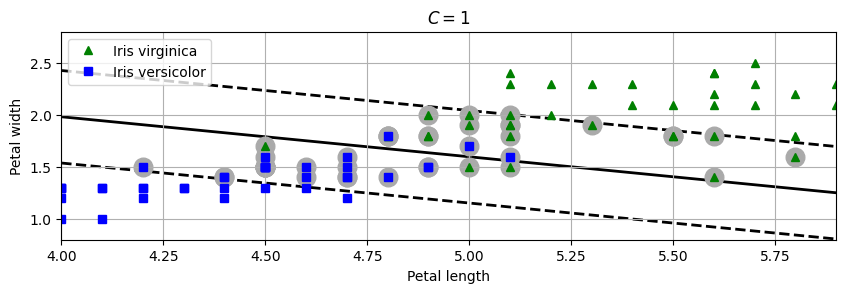

In [82]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 2.7))
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

Instead of using `LinearSVC` class, we could use the `SVC` class with a linear kernel. When creating the SVC model, we would write `SVC(kernel="linear", C=1)`. Or we could use the `SGDClassifier` class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It doesn't converge as fast as the `LinearSVC`, but it can be useful to handle online classification tasks or huge datasets that don't fit in memory (out-of-core training)